## Linear regression

In [49]:
import pandas as pd
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def linear_regression():
    # Step # 1 - Extract data
    #famrel - relations in family from 1 to 5, g3 - final portugal grades
    df = pd.read_csv('student-por.csv',header=0,usecols=['famrel','G3'])
    points = df.iloc[:100,:].values 
    # Step # 2 - Define hyperparameters
    
    ## Learning rate
    learning_rate = 0.0001
    
    ## Coefficients y = a * x + b
    init_a = 0
    init_b = 0
    
    ## number of iterations
    num_iterations = 10000
    
    # Step 3 - model training
    
    print(
        'Start learning at a = {0}, b = {1}, error = {2}'.format(
            init_a,
            init_b,
            compute_error(init_a, init_b, points)
        )
    )
    
    a, b = gradient_descent(init_a, init_b, points, learning_rate, num_iterations)
    
    print(
        'End learning at a = {0}, b = {1}, error = {2}'.format(
            a,
            b,
            compute_error(a, b, points)
        )
    )
    
    return a, b


def compute_error(a, b, points):
    '''
        Computes Error = 1/N * sum((y - (ax + b))^2)
    '''
    error = 0
    N = len(points)
    
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        
        error += (y - (a * x + b)) ** 2

    return error / N

def gradient_descent(starting_a, starting_b, points, learning_rate, num_iterations):
    '''
        Performs gradient step num_iterations times
        in order to find optimal a, b values
    '''
    a = starting_a
    b = starting_b
    
    for i in range(num_iterations):
        a, b = gradient_step(a, b, points, learning_rate)
    return a, b

def gradient_step(current_a, current_b, points, learning_rate):
    '''
        Updates a and b in antigradient direction
        with given learning_rate
    '''
    a = current_a
    b = current_b
    
    a_gradient = 0
    b_gradient = 0
    
    N = len(points)
    
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        
        a_gradient += - (2 / N) * x * (y - (a * x + b))
        b_gradient += - (2 / N) * (y - (a * x + b))
    
    a = current_a - learning_rate * a_gradient
    b = current_b - learning_rate * b_gradient
    
    return a, b

In [51]:
a, b = linear_regression()

Start learning at a = 0, b = 0, error = 160.17
End learning at a = 2.5726721838422613, b = 1.756504152665662, error = 9.541800256059656


## Plot Cost funstion

In [52]:
def plot_decorator(f):
    df = pd.read_csv('student-por.csv',header=0,usecols=['famrel','G3'])
    points = df.iloc[:100,:].values
    
    return lambda a, b: f(a, b, points)

cost = plot_decorator(compute_error)

In [53]:
A = np.linspace(-10, 12, 40)
B = np.linspace(-10, 12, 40)

A, B = np.meshgrid(A, B)
E = cost(A, B)

Text(0.5,0,'cost')

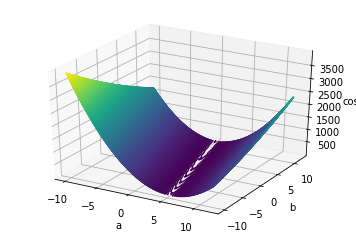

In [54]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(A, B, E, 1000)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('cost')

## Plot data and learned function

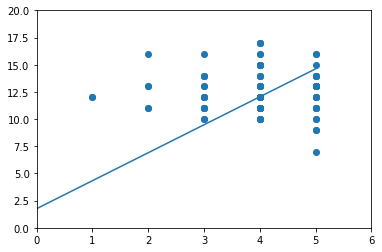

In [55]:
df = pd.read_csv('student-por.csv',header=0,usecols=['famrel','G3'])
points = df.iloc[:100,:].values
X = points[:, 0]
Y = points[:, 1]

plt.xlim(0, 6)
plt.ylim(0, 20)
plt.scatter(X, Y)

params = np.linspace(0, 5, 10)

plt.plot(params, a * params + b)

plt.show()
